<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Import Needed Libraries</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Loading Dataset And Get Info¶</h1>
</div>

In [2]:
# Loading Data
df = pd.read_csv("/kaggle/input/laptop-price-prediction-dataset/data.csv")

In [3]:
# Showing 12 Rows Randomly
df.sample(12)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
439,460,524,Asus,VivoBook 15 X1500EA-EJ322WS Laptop,33990,69.323529,11th Gen intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
404,424,479,Acer,Aspire 3 A315-24P NX.KDESI.004 Laptop,37990,69.323529,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",8GB,LPDDR5,512GB,SSD,AMD Radeon Graphiics,15.6,1920.0,1080.0,Windows 11 OS,1
818,856,943,Lenovo,ThinkPad T14 2022 Laptop,159000,72.000000,12th Gen Intel Core i7 1260P,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1200.0,Windows 11 OS,1
425,445,509,Honor,MagicBook 14 WDQ9BHNE Laptop,41990,69.323529,5th Gen AMD Ryzen 5 5500U,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,AMD Radeon,14.0,1920.0,1080.0,Windows 11 OS,1
863,901,989,Dell,Inspiron 7430 IC7430PXXWC001ORS1 Laptop,72990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",8GB,LPDDR5,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1200.0,Windows 11 OS,1
184,190,213,MSI,Modern 14 C11M-030IN Laptop,36990,69.323529,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",8GB,DDR4,512GB,SSD,Intel Integrated Iris Xe,14.0,1920.0,1080.0,Windows 11 OS,1
191,197,222,Samsung,Galaxy Book 3 Laptop,69990,69.323529,13th Gen Intel Core i5 1340P,"12 Cores (4P + 8E), 16 Threads",8GB,LPDDR5,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
647,679,761,MSI,Katana 15 B12UDXK-1004IN Gaming Laptop,85990,76.000000,12th Gen Intel Core i7 12650H,"10 Cores (6P + 4E), 16 Threads",16GB,DDR5,512GB,SSD,6GB NVIDIA GeForce RTX 3050,15.6,1920.0,1080.0,Windows 11 OS,2
60,61,64,Lenovo,LOQ 15IRH8 82XV00BQIN 2023 Gaming Laptop,96990,67.000000,13th Gen Intel Core i7 13620H,"10 Cores (6P + 4E), 16 Threads",16GB,DDR5,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1
470,491,557,Dell,Inspiron 3511 Laptop,49990,69.323529,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,15.6,1920.0,1080.0,Windows 10 OS,1


In [4]:
# Shape of DataSet
# df.shape
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")


Number of column :18
Number of rows :893


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [6]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [8]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
             })

,count,nulls,nulls%,cardinality
Unnamed: 0.1,893,0,0.0,893
Unnamed: 0,893,0,0.0,893
brand,893,0,0.0,30
name,893,0,0.0,815
price,893,0,0.0,464
spec_rating,893,0,0.0,30
processor,893,0,0.0,184
CPU,893,0,0.0,29
Ram,893,0,0.0,7
Ram_type,893,0,0.0,12


<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;"> Delete unnecessary columns</h1>
</div>

In [9]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [10]:
# Shape After Clean
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :16
Number of rows :893


In [11]:
df.describe()

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [12]:
# Drop rows with missing values
df = df.dropna()
df.isnull().sum()

brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

# STARTING VISUALIZATIONS 

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">How many brands we have </h1>
</div>

In [13]:
counts_of_brands = df["brand"].value_counts()
counts_of_brands

brand
HP           186
Lenovo       169
Asus         157
Dell         107
Acer          84
MSI           65
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Zebronics      4
Ultimus        4
Tecno          3
Wings          3
Chuwi          3
Realme         3
Microsoft      2
AXL            2
Huawei         2
Honor          2
Walker         1
Vaio           1
Avita          1
Primebook      1
Ninkear        1
Razer          1
iBall          1
Name: count, dtype: int64

In [14]:
print(f"The highest popular brand in the market is '{counts_of_brands.idxmax()}'")

The highest popular brand in the market is 'HP'


In [15]:
iplot(px.bar(counts_of_brands,
             text_auto = True,
             color = counts_of_brands.index,
             color_discrete_sequence = colors,
             title = 'Top 10 Brands in The World',
             labels=dict(index='brands',value='sum')))

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">total price per brand </h1>
</div>

In [16]:
price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)
price_brand

brand
Razer        199990.000000
Apple        174230.875000
Gigabyte     133279.125000
LG           128618.444444
Samsung      117512.142857
MSI          100849.630769
Dell          91150.934579
Fujitsu       81656.666667
HP            80872.473118
Ninkear       79999.000000
Asus          75774.191083
Lenovo        70060.946746
Microsoft     60440.000000
Acer          58651.178571
Huawei        56999.000000
Xiaomi        56543.875000
Honor         47490.000000
Realme        44329.333333
Tecno         43999.000000
Infinix       43990.000000
Vaio          39990.000000
Zebronics     37990.000000
Wings         37323.333333
Chuwi         31659.666667
Avita         21990.000000
Ultimus       19115.000000
Walker        16990.000000
AXL           14490.000000
Primebook     10990.000000
iBall          9999.000000
Name: price, dtype: float64

In [17]:
print(f"Most expensive brand in the market '{price_brand.idxmax()}'")

Most expensive brand in the market 'Razer'


In [18]:
iplot(px.bar(price_brand,
             color=price_brand.index,
             labels={'brand':'Name Of Brand','value':'AVG of Price'},
             text_auto=True,
             title='Is Brand affect on Price ?'))



<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">spec ratings</h1>
</div>

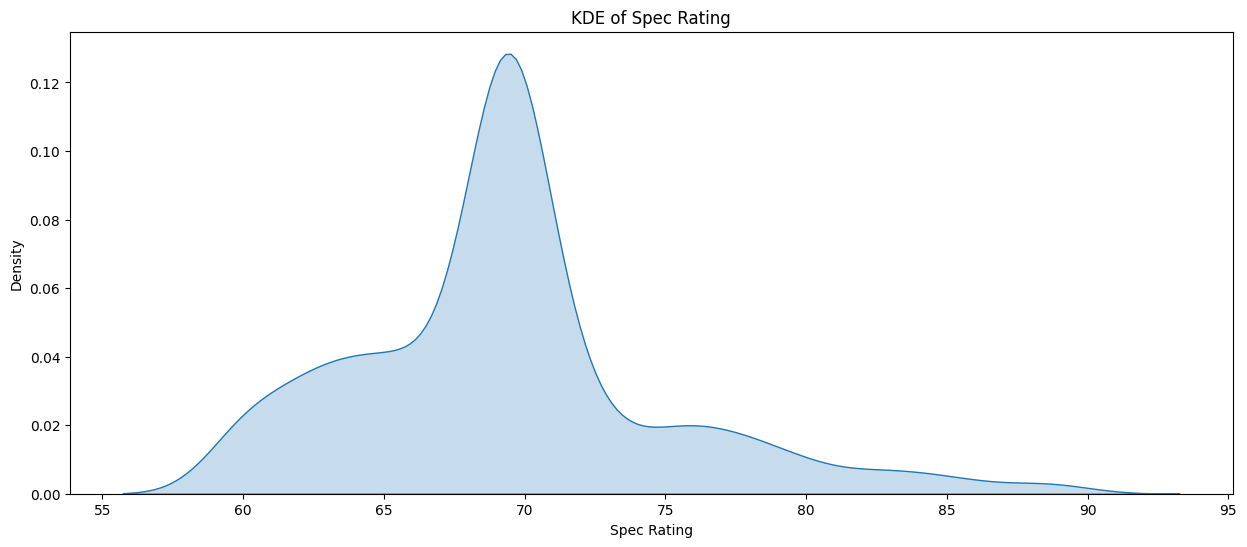

In [19]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['spec_rating'],fill=True)
plt.xlabel('Spec Rating')
plt.title('KDE of Spec Rating')
plt.show()

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Processors</h1>
</div>

In [20]:
processors = df['processor'].value_counts()[:15]
processors

processor
12th Gen Intel Core i5 1235U     49
13th Gen Intel Core i5 1335U     41
12th Gen Intel Core i3 1215U     38
11th Gen Intel Core i3 1115G4    36
12th Gen Intel Core i5 12450H    33
13th Gen Intel Core i7 1360P     18
7th Gen AMD Ryzen 3 7320U        17
12th Gen Intel Core i5 12500H    17
7th Gen AMD Ryzen 5 7520U        17
13th Gen Intel Core i7 13700H    16
7th Gen AMD Ryzen 5 7530U        16
7th Gen AMD Ryzen 7 7840HS       16
11th Gen Intel Core i5 1135G7    15
5th Gen AMD Ryzen 5 5500U        15
12th Gen Intel Core i5 1240P     15
Name: count, dtype: int64

In [21]:
iplot(px.bar(processors,
             color=processors.index,
             labels={'value':'Numebr','index':'Name of Processor'},
             title='Top 10 Processors Popular',
             orientation='h',
))

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">CPU</h1>
</div>

In [22]:
cpu = df['CPU'].value_counts()[:15]
cpu

CPU
Quad Core, 8 Threads               130
Hexa Core, 12 Threads              126
10 Cores (2P + 8E), 12 Threads     125
Octa Core, 16 Threads              102
12 Cores (4P + 8E), 16 Threads      83
Dual Core, 4 Threads                55
14 Cores (6P + 8E), 20 Threads      50
Hexa Core (2P + 4E), 8 Threads      44
Octa Core (4P + 4E), 12 Threads     43
Dual Core, 2 Threads                36
10 Cores (6P + 4E), 16 Threads      26
24 Cores (8P + 16E), 32 Threads     16
16 Cores (8P + 8E), 24 Threads      10
14 Cores (6P + 8E)                   9
5 Cores (1P + 4E), 6 Threads         7
Name: count, dtype: int64

In [23]:
iplot(px.bar(cpu,
             color=cpu.index,
             labels={'value':'Numebr','index':'Name of CPU'},
             title='Top 15 CPU Popular',
             orientation='h',
))

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">RAM</h1>
</div>

# RAM

In [24]:
ram = df['Ram'].value_counts()
ram

Ram
16GB    456
8GB     369
32GB     40
4GB      22
64GB      3
12GB      2
2GB       1
Name: count, dtype: int64

In [25]:
iplot(px.pie(values = ram,
       names=['16GB','8GB','32GB','4GB','64GB','12GB','2GB'],
       color_discrete_sequence = colors,
       title="Ram counts").update_traces(textinfo='value+percent'))

# RAM TYPE

In [26]:
Ram_type_counts = df['Ram_type'].value_counts()

In [27]:
iplot(px.bar(Ram_type_counts,
             orientation='h',
             color=Ram_type_counts.index,
             text=Ram_type_counts.values,
             labels={'index':'RAM Type'},
             title='Most Type of RAM is Used in laptop'

))

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">ROM</h1>
</div>

In [28]:
rom_counts = df['ROM'].value_counts()

In [29]:
iplot(px.bar(rom_counts,
            title='ROM counts', 
            text_auto=True,
            labels=dict(index='ROM',value='counts'),
            color_discrete_sequence=[colors[0]]))

# Rom Type

In [30]:
rom_type = df['ROM_type'].value_counts()

In [31]:
iplot(px.pie(values=rom_type,
             names=['SSD','Hard-Disk'],
             title='ROM Type in Labtops',
             color=rom_type.index,
).update_traces(textinfo='label+percent'))

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">GPU</h1>
</div>

In [32]:
gpu_counts = df['GPU'].value_counts()[0:10]

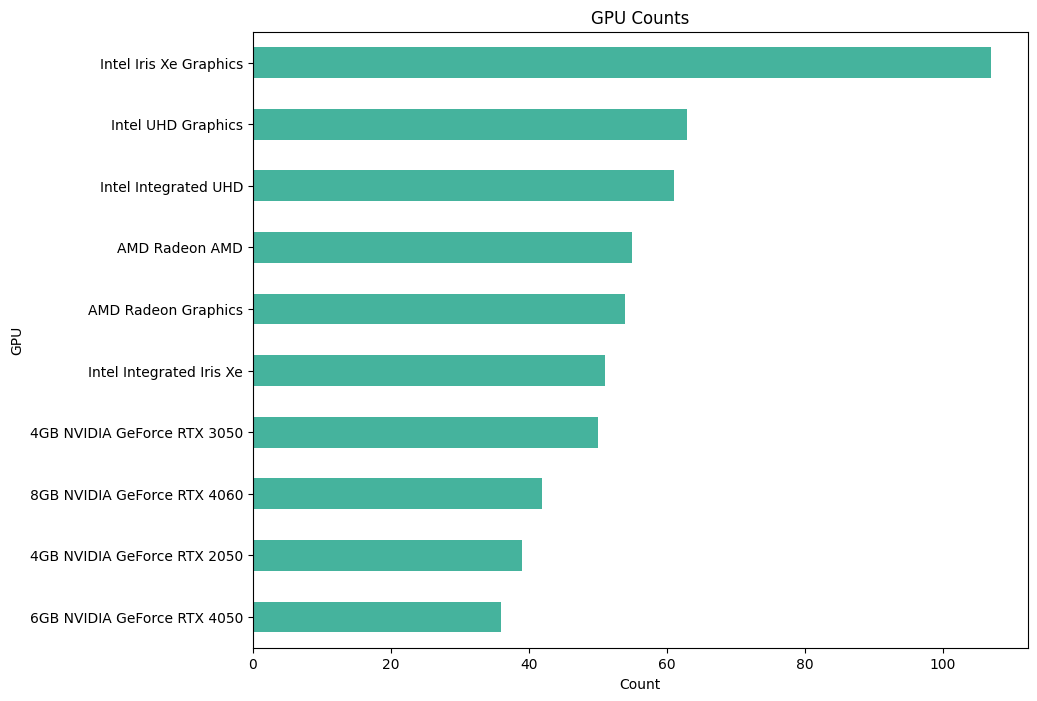

In [33]:
gpu_counts.sort_values().plot(kind='barh', x='CPU', y='Count',color = ['#45B39D'], figsize=(10, 8))
plt.xlabel('Count')
plt.ylabel('GPU')
plt.title('GPU Counts')
plt.show()

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">OS</h1>
</div>

In [34]:
os_counts = df['OS'].value_counts()

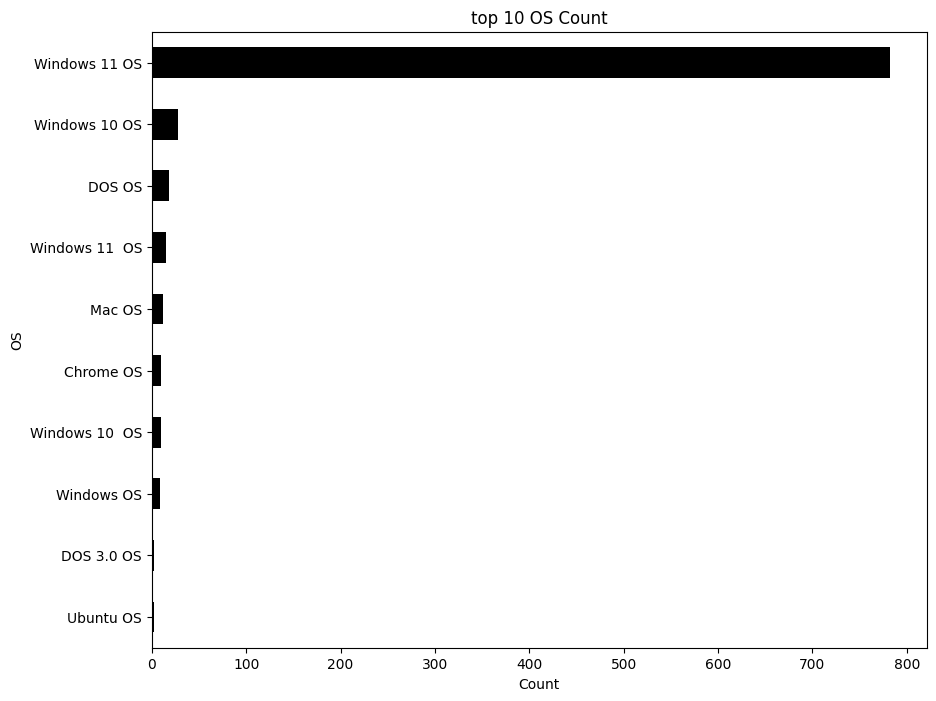

In [35]:
plt.figure(figsize=(10, 8))
os_counts.head(10).sort_values().plot(kind='barh', color='black')  
plt.xlabel('Count')
plt.ylabel('OS')
plt.title('top 10 OS Count')
plt.show()

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Discounts</h1>
</div>

In [36]:
non_object_columns = df.select_dtypes(exclude=['object']).columns.tolist()

In [37]:
for i in range(len(non_object_columns)):
    fig = px.histogram(df, 
                       non_object_columns[i], 
                       title=f'{non_object_columns[i]} distribution in top hits' ,
                        color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

<div style="background-color: #0f0f0f; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">END</h1>
</div>